<h1 align = 'center'><u>Telecom Customer Churn</u></h1>
<h5 align = 'center'>Focused customer retention programs</h5>

### # Data Source:- https://www.kaggle.com/blastchar/telco-customer-churn
### # Context:-
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

### # Content:-
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

   ##### The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents
### # Inspiration:-
    To explore this type of models and learn more about the subject.

## Importing important library:~

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warning messages:-
import warnings
warnings.filterwarnings('ignore')


# 1. Loading Our Dataset:~

In [2]:
df = pd.read_csv('Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# checking for any missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### There is no missing values present

# 2. Feature Engineering:~

In [4]:
# check for the data type of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

##### From the info we get to know that our target feature is a categorical data

In [5]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#### Converting the data type of our target data Churn:
* NO = 0
* Yes = 1

In [6]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [7]:
# check our converted data
print(df['Churn'].value_counts())
print('\nDataType of Churn data :',np.dtype(df['Churn']))

0    5174
1    1869
Name: Churn, dtype: int64

DataType of Churn data : int64


In [8]:
df.shape

(7043, 21)

# 3. Visualization:~

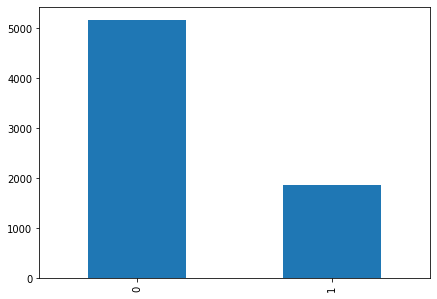

In [9]:
df['Churn'].value_counts().plot.bar(figsize=(7,5));

##### From above graph we can say that our data is not imbalance data

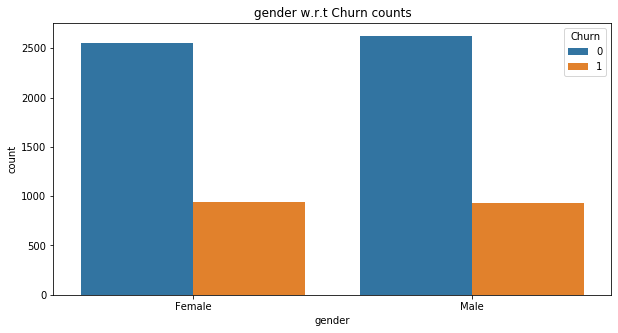

In [10]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= df['gender'],data = df, ax=ax ,hue= 'Churn')
ax.set(title='gender w.r.t Churn counts')
ax.figsize=(12,5)

##### Not much difference

In [11]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

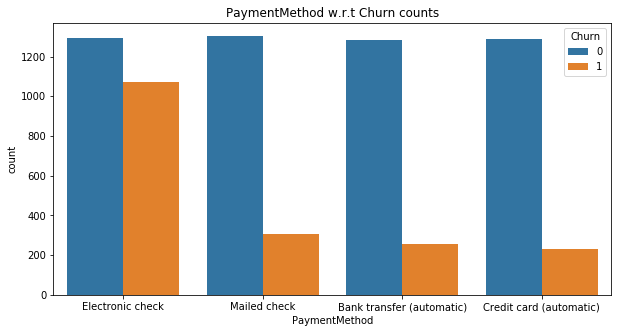

In [12]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= df['PaymentMethod'],data = df, ax=ax ,hue= 'Churn')
ax.set(title='PaymentMethod w.r.t Churn counts')
ax.figsize=(12,5)

#### From above graph we can say that those who pay through Electronic Check are more likely to leave the subscription.

In [13]:
df['MonthlyCharges'].sort_values(ascending=False).mean()

64.76169246059919

In [14]:
df['M_charges'] = df['MonthlyCharges'].apply(lambda x: 'High' if x>df['MonthlyCharges'].mean() else 'Low')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,M_charges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,0,Low
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Low
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Low
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,High


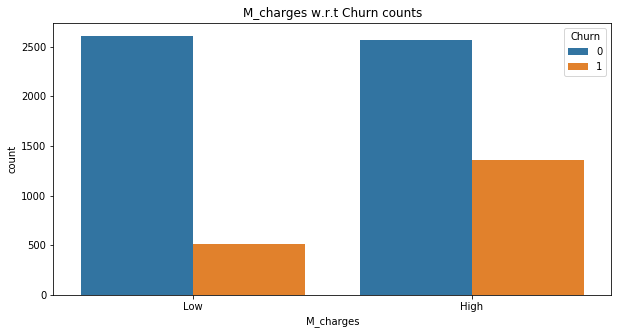

In [15]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= df['M_charges'],data = df, ax=ax ,hue= 'Churn')
ax.set(title='M_charges w.r.t Churn counts')
ax.figsize=(12,5)

##### From above graph High monthly charge has shown high no. of churned customer

In [16]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

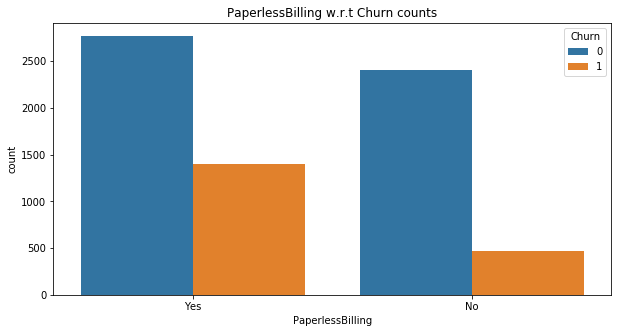

In [17]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= df['PaperlessBilling'],data = df, ax=ax ,hue= 'Churn')
ax.set(title='PaperlessBilling w.r.t Churn counts')
ax.figsize=(12,5)

##### People who like Paperless billing are more likely to churned.

In [18]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

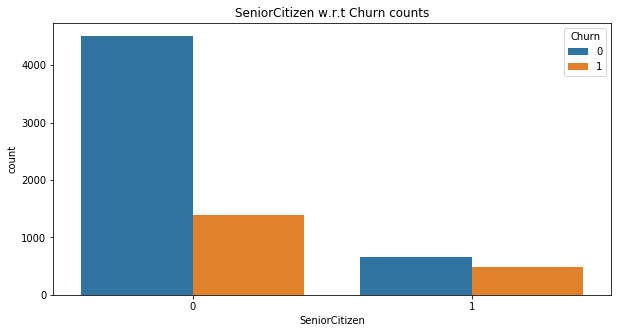

In [19]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= df['SeniorCitizen'],data = df, ax=ax ,hue= 'Churn')
ax.set(title='SeniorCitizen w.r.t Churn counts')
ax.figsize=(12,5)

##### SeniorCitizen are more likely to churn

In [20]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

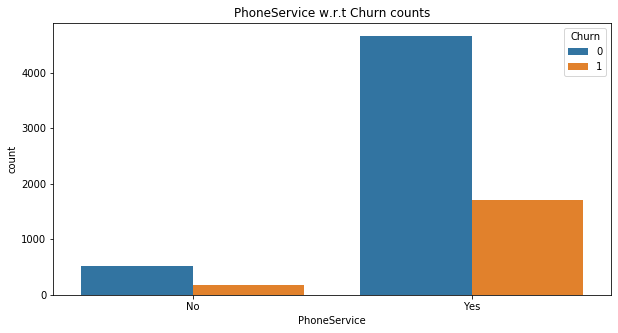

In [21]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= df['PhoneService'],data = df, ax=ax ,hue= 'Churn')
ax.set(title='PhoneService w.r.t Churn counts')
ax.figsize=(12,5)

#### not much change

In [22]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

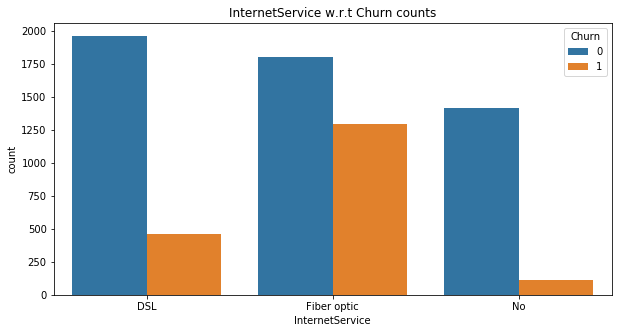

In [23]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= df['InternetService'],data = df, ax=ax ,hue= 'Churn')
ax.set(title='InternetService w.r.t Churn counts')
ax.figsize=(12,5)

##### Fiber optic internet service are more likely to churn

In [24]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

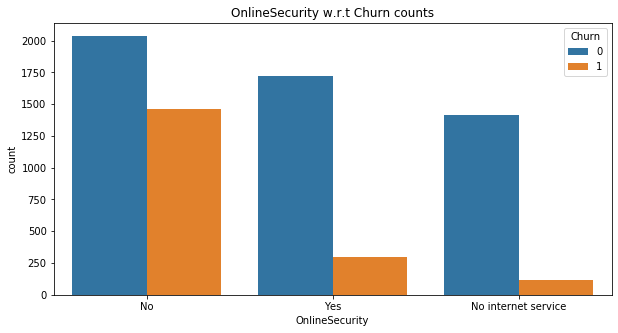

In [25]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= df['OnlineSecurity'],data = df, ax=ax ,hue= 'Churn')
ax.set(title='OnlineSecurity w.r.t Churn counts')
ax.figsize=(12,5)

##### People with No online security are more likely to churn and it is obvious.

In [26]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'M_charges'],
      dtype='object')

In [27]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

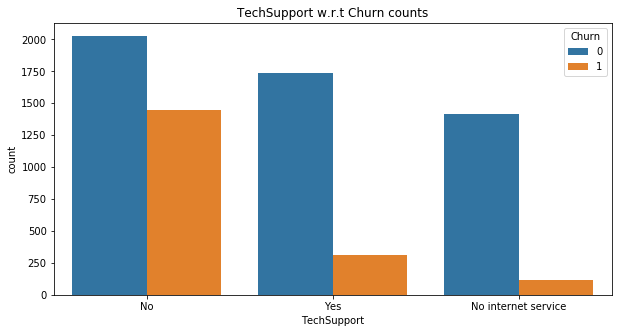

In [28]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= df['TechSupport'],data = df, ax=ax ,hue= 'Churn')
ax.set(title='TechSupport w.r.t Churn counts')
ax.figsize=(12,5)

In [29]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

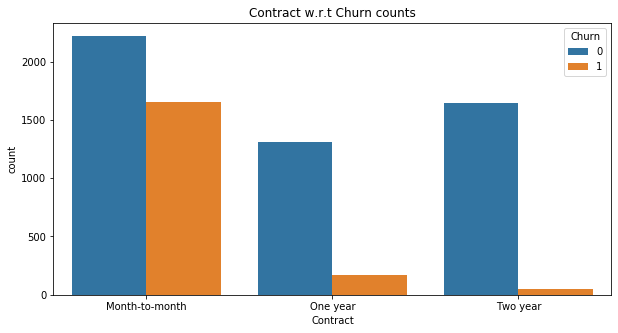

In [30]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= df['Contract'],data = df, ax=ax ,hue= 'Churn')
ax.set(title='Contract w.r.t Churn counts')
ax.figsize=(12,5)

##### Month to month subscriber are more likely to churn
* Loyal customer with more then 2 year of subscription have very less value of churn 

In [31]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

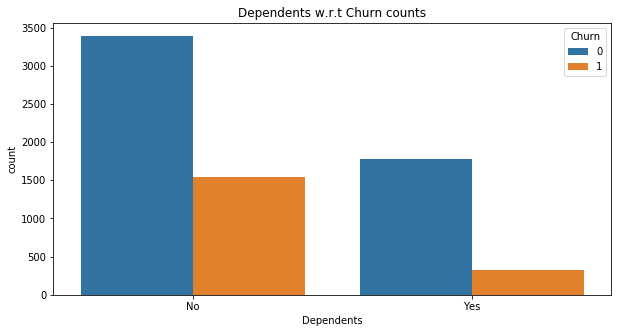

In [32]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= df['Dependents'],data = df, ax=ax ,hue= 'Churn')
ax.set(title='Dependents w.r.t Churn counts')
ax.figsize=(12,5)

In [34]:
df['tenure'][0:].sort_values(ascending = False).head()

3543    72
3635    72
4574    72
917     72
914     72
Name: tenure, dtype: int64

In [36]:
df['Reliable_user'] = df['tenure'].apply(lambda x: 'High' if x>24 else 'Low')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,M_charges,Reliable_user
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Low,Low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,Low,High
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Low,Low
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Low,High
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,High,Low


In [37]:
df['Reliable_user'].value_counts()

High    3833
Low     3210
Name: Reliable_user, dtype: int64

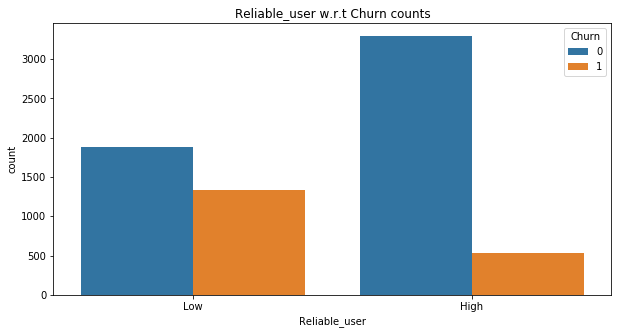

In [38]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= df['Reliable_user'],data = df, ax=ax ,hue= 'Churn')
ax.set(title='Reliable_user w.r.t Churn counts')
ax.figsize=(12,5)

#### Low reliable subcriber is more likely to churn

In [39]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

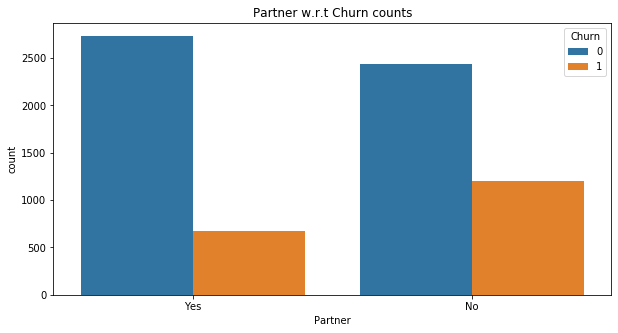

In [40]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= df['Partner'],data = df, ax=ax ,hue= 'Churn')
ax.set(title='Partner w.r.t Churn counts')
ax.figsize=(12,5)

#### Those subscriber with no partner are more likely to churn

In [48]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

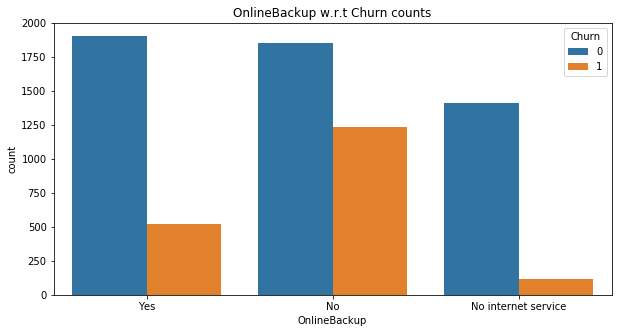

In [50]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x= df['OnlineBackup'],data = df, ax=ax ,hue= 'Churn')
ax.set(title='OnlineBackup w.r.t Churn counts')
ax.figsize=(12,5)

#### subcribers with no online backup are more likely to churn

# 4. Creating dataset for prediction :~

In [41]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,M_charges,Reliable_user
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,Low,Low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,Low,High
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Low,Low
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,Low,High
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,High,Low


In [47]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'M_charges',
       'Reliable_user'],
      dtype='object')

In [54]:
train = df.drop(['TotalCharges','Churn','MonthlyCharges','tenure','StreamingTV', 'StreamingMovies'], 1)
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,M_charges,Reliable_user
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,Low,Low
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,Low,High
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,Low,Low
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),Low,High
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,High,Low


In [92]:
train.select_dtypes('object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'M_charges', 'Reliable_user'],
      dtype='object')

In [61]:
dum = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
       'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','PaperlessBilling',
       'PaymentMethod','M_charges','Reliable_user']

In [67]:
t = train.copy()

In [70]:
t.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,M_charges,Reliable_user
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,Low,Low
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,One year,No,Mailed check,Low,High
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,Low,Low
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),Low,High
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,High,Low


In [91]:
dummie = pd.get_dummies(t[dum], drop_first=True)
dummie.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,M_charges_Low,Reliable_user_Low
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
1,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,1,1
3,1,0,0,0,1,0,0,0,0,1,...,0,1,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [93]:
t1 = t.drop(t[dum],1)
t1.head()

,customerID,SeniorCitizen
0,7590-VHVEG,0
1,5575-GNVDE,0
2,3668-QPYBK,0
3,7795-CFOCW,0
4,9237-HQITU,0


In [94]:
X = pd.concat([t1,dummie],1)

In [95]:
X.head()

,customerID,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,M_charges_Low,Reliable_user_Low
0,7590-VHVEG,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,1
1,5575-GNVDE,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,3668-QPYBK,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1
3,7795-CFOCW,0,1,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
4,9237-HQITU,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,1


In [99]:
X = X.drop('customerID',1)
X.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,M_charges_Low,Reliable_user_Low
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
1,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1
3,0,1,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,1


In [98]:
test = df[['customerID','Churn']]
test.head()

,customerID,Churn
0,7590-VHVEG,0
1,5575-GNVDE,0
2,3668-QPYBK,1
3,7795-CFOCW,0
4,9237-HQITU,1


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,test,test_size=0.2,random_state=10)

In [104]:
Y_train = y_train.drop('customerID',1)
Y_train.head()

,Churn
1182,0
4328,0
6091,1
4870,0
4683,0


In [105]:
Y_test = y_test.drop('customerID',1)
Y_test.head()

,Churn
6418,0
1948,1
4497,0
66,0
1705,0


In [106]:
X_train.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,M_charges_Low,Reliable_user_Low
1182,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4328,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,1,1
6091,1,1,1,0,1,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,1
4870,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4683,0,1,0,0,1,0,1,1,0,0,...,0,0,0,0,1,0,1,0,0,1


In [107]:
X_test.head()

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TechSupport_No internet service,TechSupport_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,M_charges_Low,Reliable_user_Low
6418,0,1,1,0,1,0,1,0,0,0,...,0,1,1,0,1,0,0,1,0,0
1948,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4497,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
66,0,1,1,0,1,0,1,1,0,0,...,0,0,1,0,1,0,1,0,0,0
1705,1,0,1,0,1,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,0


# 5. Model Selection:~

In [108]:
# Import important libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB 

In [109]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [110]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.794180269694819

In [122]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,Y_train)
rf.score(X_test,Y_test)

0.765791341376863

In [112]:
dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)
dt.score(X_test,Y_test)

-0.3111457268832054

In [113]:
gnb = GaussianNB() 
gnb.fit(X_train, Y_train)
gnb.score(X_train, Y_train)

0.688675896343628

In [123]:
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)
gb.score(X_train, Y_train)

0.8044018459353922

#### From above Gradient Boosting Classifier have high score. Therefore we will use it for prediction

# 6. Prediction:~

In [125]:
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [126]:
predictions = model.predict(X_test)

In [127]:
predictions

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [129]:
Y_predict = pd.DataFrame(predictions, columns = ['Predicted Churn'])
Y_predict.head()

,Predicted Churn
0,0
1,1
2,0
3,0
4,0


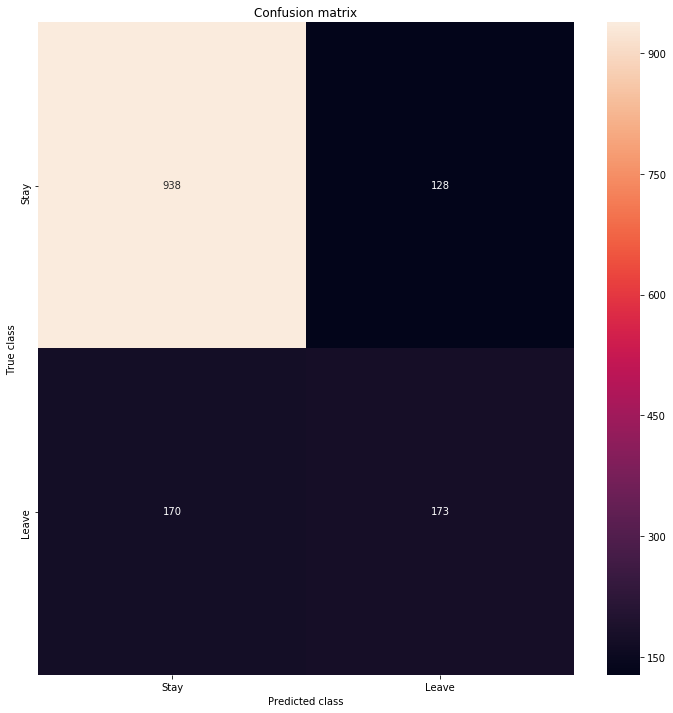

In [139]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(Y_test, predictions)
plt.figure(figsize=(12, 12))
LABELS = ["Stay", "Leave"]
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [133]:
Y_test['Churn'].value_counts()

0    1066
1     343
Name: Churn, dtype: int64

In [134]:
Y_predict['Predicted Churn'].value_counts()

0    1108
1     301
Name: Predicted Churn, dtype: int64

In [141]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1066
           1       0.57      0.50      0.54       343

    accuracy                           0.79      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



### We have got a Little errors but most of our predictions are correct

In [142]:
Final_data = pd.DataFrame({'customerID':y_test['customerID'], 'actual Churn': y_test['Churn'],
                          'Predicted Churn': predictions })
Final_data

,customerID,actual Churn,Predicted Churn
6418,2486-WYVVE,0,0
1948,8183-ONMXC,1,1
4497,0575-CUQOV,0,0
66,8627-ZYGSZ,0,0
1705,4918-FYJNT,0,0
924,4824-GUCBY,0,0
1051,3845-JHAMY,0,0
7012,6691-CCIHA,0,0
3723,7010-ZMVBF,0,0
4590,4884-TVUQF,0,0


<h1 align = 'center'> *------E N D------* </h1>